# Earthquake Data Analysis

The project consists of analyzing a dataset (called also "catalog") of earthquakes collected in about 20 years of recording in South California.

The catalog includes the magnitude, time of occurrence (s), and 3D coordinates (m) of earthquakes. Coordinates were converted from latitude, longitude, and depth of events in a seismic catalog. Magnitudes should be within the range $[0,8]$.

* __Waiting time (t)__: time interval between an event and the next one in the sequence.
* __Distance (r)__: Euclidean 3D distance between events (each 3D set of coordinates refers to the hypocenter, i.e. the point triggering the slip in a fault that forms the earthquake).

## Data

The catalog `SouthCalifornia-1982-2011.dat` is a data file with the following content:

* column 1: index of the event
* column 2: index of the previous event that triggered it (defined with a given algorithm), -1 if no ancestor is found
* column 3: time (seconds) from 0:00 of Jan.1st, 1982
* column 4: magnitude
* columns 5, 6, and 7: 3D coordinates (in meters) of the earthquake hypocenter, i.e. of the point from where it started. These Euclidean coordinates are derived from latitude, longitude and depth.

By joining each event to that with the index of the second column (if not -1), a set of causal trees would emerge.


## Assignments

1. Visualize the process in space and/or time with a suitable time series and/or 3D visualizations of the hypocenters. For instance, plot a space variable (a single coordinate or an appropriate linear combination of coordinates) as a function of time.
2. Compute the distribution $P_m(t)$ of waiting times for events of magnitude $m$ or above (i.e. do not consider events below $m$). In shaping the bin sizes, take into account that this distribution is expected to have a power-law decay with time (e.g $\sim 1/t$), and that a power-law is well visualized in log-log scale. Do this analysis for many values of $m$, say $m=2,3,4,5$. If deemed appropriate, choose a function and fit it to the data.
3. Compute the distribution $P_m(r)$ of the distance between an event and the next one, considering earthquakes of magnitude $m$ or above. Make a clever choice for the bin sizes, and try several values of $m$. Fit the data with an appropriate function, if possible.
4. Compute the distribution $P_{m,R}(t)$ of waiting times for events of magnitude $m$ or above, which are separated by at most a distance $r<R$, for different values of m and $R$. In this case, if the following event is farther than $R$, skip the $t$ and go to the next pair.
5. Comment whether there is a scaling law from the analysis of the previous points. Is there a suitable rescaling that collapses distributions for various $m$ (and eventually $R$ if point 4 is considered) on a single curve?

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 


columns = ['Event', 'Prev event', 'Time [s]', 'Magnitude', 'x [m]', 'y [m]', 'z [m]']
df = pd.read_csv('SouthCalifornia-1982-2011.dat', sep=" ", header=None)
df.columns = columns
df

,Event,Prev event,Time [s],Magnitude,x [m],y [m],z [m]
0,0,-1,0.000000e+00,2.71,-2571956,-4627162,3520602
1,1,0,3.650139e+04,2.12,-2363740,-4787011,3461373
2,2,0,3.748828e+04,2.33,-2363746,-4786942,3461232
3,3,0,4.798252e+04,2.57,-2475085,-4664024,3548479
4,4,0,6.026857e+04,2.98,-2238642,-4839098,3469546
...,...,...,...,...,...,...,...
110266,110266,-1,9.304996e+08,2.60,-2668492,-4335735,3810743
110267,110267,-1,9.305115e+08,2.02,-2297480,-4823870,3445285
110268,110268,-1,9.305318e+08,2.00,-2404797,-4441247,3868121
110269,110269,-1,9.305363e+08,2.17,-2388375,-4691191,3550903


In [3]:

df_describe = df.describe()
df_describe

,Event,Prev event,Time [s],Magnitude,x [m],y [m],z [m]
count,110271.000000,110271.000000,1.102710e+05,110271.000000,1.102710e+05,1.102710e+05,1.102710e+05
mean,55135.000000,35859.277625,4.262426e+08,2.457920,-2.388225e+06,-4.691072e+06,3.562612e+06
std,31832.640104,36365.001297,2.598605e+08,0.438374,8.878019e+04,1.237294e+05,1.271897e+05
min,0.000000,-1.000000,0.000000e+00,2.000000,-2.770239e+06,-5.020849e+06,3.186133e+06
25%,27567.500000,-1.000000,2.115783e+08,2.140000,-2.421620e+06,-4.801152e+06,3.458838e+06
50%,55135.000000,28462.000000,3.551023e+08,2.340000,-2.361829e+06,-4.699729e+06,3.564367e+06
75%,82702.500000,66972.000000,5.952398e+08,2.640000,-2.329898e+06,-4.615062e+06,3.634552e+06
max,110270.000000,110250.000000,9.305667e+08,7.300000,-1.998294e+06,-4.268289e+06,3.876120e+06


In [4]:
import datetime as dt 

#Converting the time tag into date starting from first of January of 1982 
df['Elapsed time'] = (pd.to_datetime(df.loc[:,'Time [s]'], unit='s', origin=pd.Timestamp('1982-01-01')))
df

,Event,Prev event,Time [s],Magnitude,x [m],y [m],z [m],Elapsed time
0,0,-1,0.000000e+00,2.71,-2571956,-4627162,3520602,1982-01-01 00:00:00.000000000
1,1,0,3.650139e+04,2.12,-2363740,-4787011,3461373,1982-01-01 10:08:21.390720000
2,2,0,3.748828e+04,2.33,-2363746,-4786942,3461232,1982-01-01 10:24:48.277440000
3,3,0,4.798252e+04,2.57,-2475085,-4664024,3548479,1982-01-01 13:19:42.516480000
4,4,0,6.026857e+04,2.98,-2238642,-4839098,3469546,1982-01-01 16:44:28.570560000
...,...,...,...,...,...,...,...,...
110266,110266,-1,9.304996e+08,2.60,-2668492,-4335735,3810743,2011-06-27 16:06:08.170560000
110267,110267,-1,9.305115e+08,2.02,-2297480,-4823870,3445285,2011-06-27 19:25:04.728000256
110268,110268,-1,9.305318e+08,2.00,-2404797,-4441247,3868121,2011-06-28 01:03:15.733440000
110269,110269,-1,9.305363e+08,2.17,-2388375,-4691191,3550903,2011-06-28 02:17:48.600960000


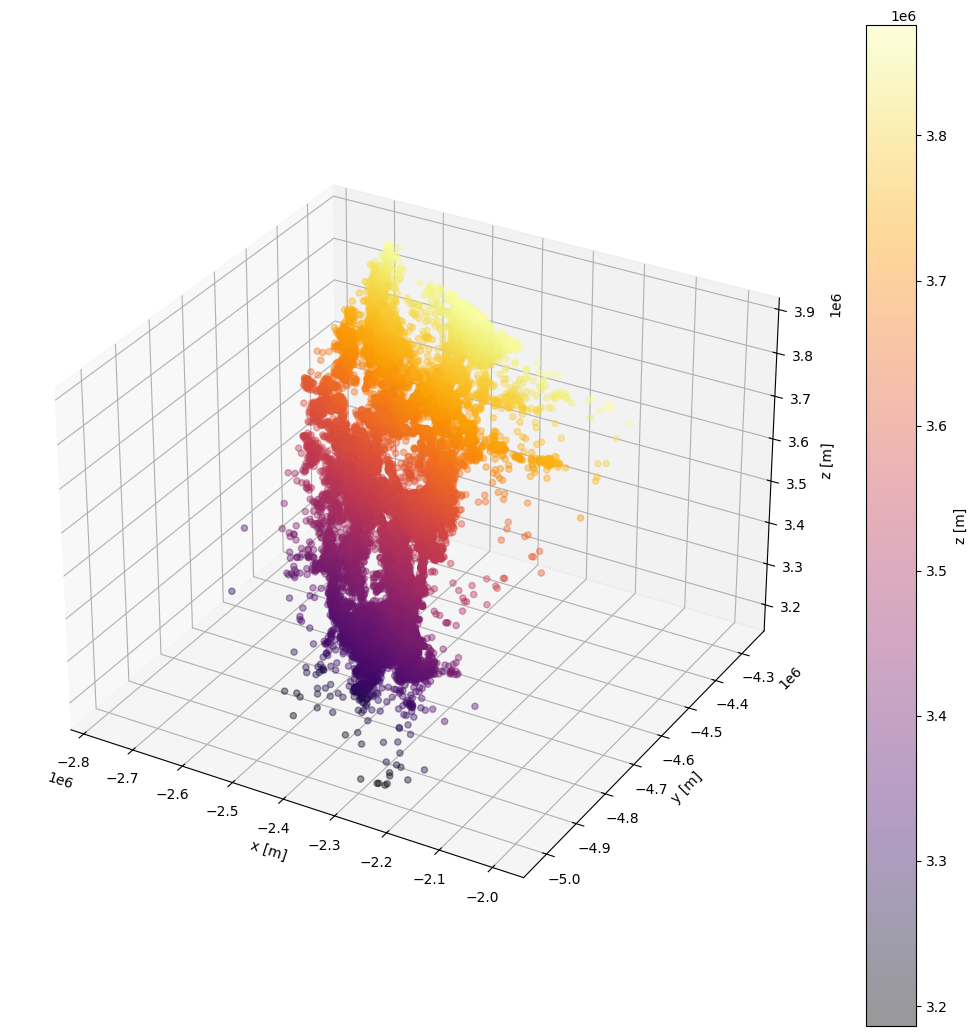

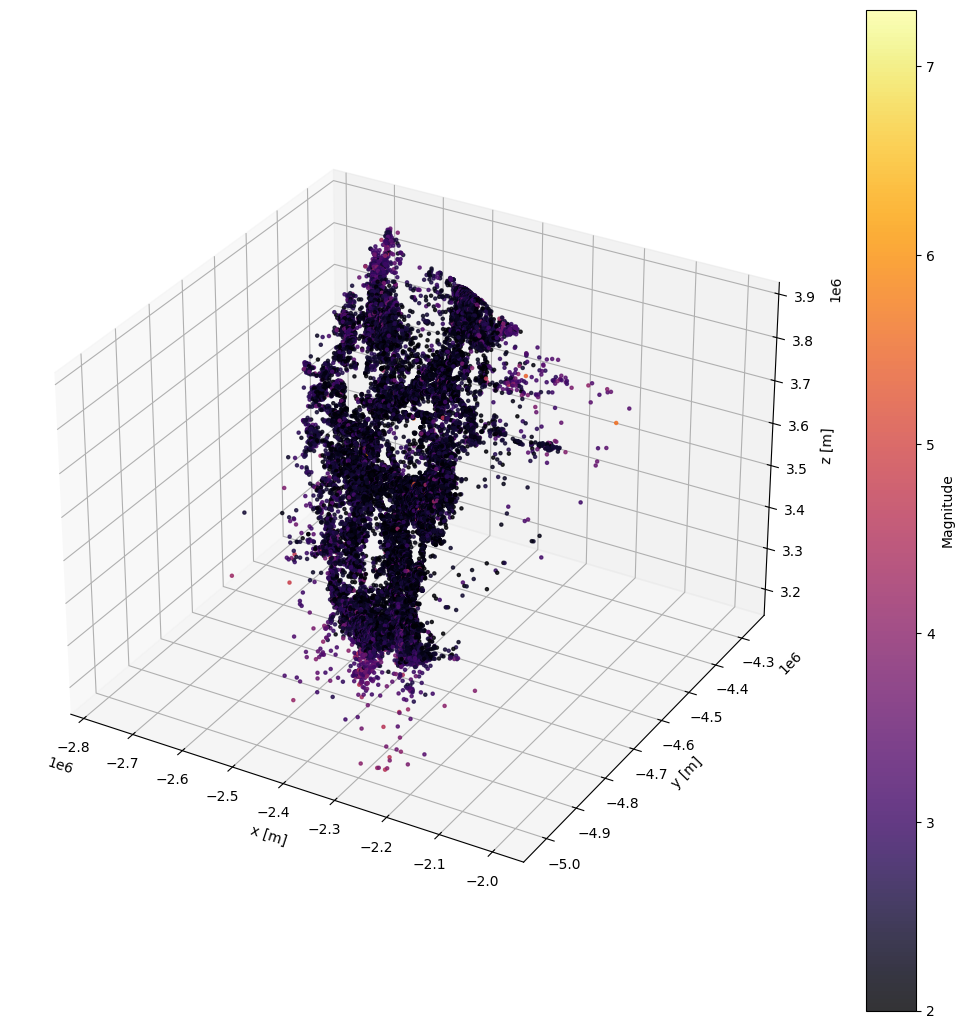

In [9]:

#plotting3D of the three space coordinates 
fig = plt.figure(figsize=(13,13))
ax = fig.add_subplot(1, 1, 1, projection='3d')
p1 = ax.scatter(df['x [m]'], df['y [m]'], df['z [m]'], c=df['z [m]'], cmap='inferno', alpha=0.4)
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_zlabel('z [m]')
col_bar = fig.colorbar(p1)
col_bar.set_label('z [m]')


fig = plt.figure(figsize=(13,13))
ax = fig.add_subplot(1, 1, 1, projection='3d')
p2 = ax.scatter(df['x [m]'], df['y [m]'], df['z [m]'], c=df['Magnitude'], cmap='inferno', marker='.', alpha=0.8)
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_zlabel('z [m]')
col_bar = fig.colorbar(p2)
col_bar.set_label('Magnitude')